<a href="https://colab.research.google.com/github/RatanakamonS/DADS5001-PART1/blob/main/HW/HW4_6620422002_Ratanakamon_Somklang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file is no longer focus on how to use pandas to plot each type of graph. Instead, this file discusses about <u>subplot and text-and-arrow annotation</u> together with the practice at the end.

In [ ]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8')   # The 'seaborn' style is deprecated

# Practice

Use our old pokemon dataset to do the following data visualization.

1. (1.5 points) Plot the number of each pokemon type.

![Question1](https://github.com/RatanakamonS/DADS5001-PART1/blob/main/HW/matplotlib3_question1_answer.png?raw=1)

In [ ]:
pokemon_df = pd.read_csv("https://raw.githubusercontent.com/RatanakamonS/DADS5001-PART1/refs/heads/main/week5/pokemon%20(1).csv")
pokemon_df.head()
type1_count = pokemon_df['type1'].value_counts()
type2_count = pokemon_df['type2'].value_counts()

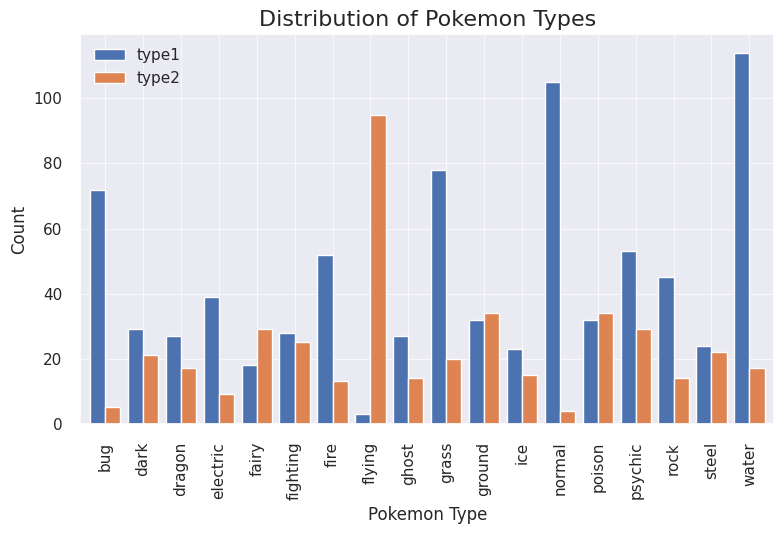

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
pokemon_df = pd.read_csv("https://raw.githubusercontent.com/RatanakamonS/DADS5001-PART1/refs/heads/main/week5/pokemon%20(1).csv")

# Get value counts for type1 and type2
type1 = pokemon_df['type1'].value_counts()
type2 = pokemon_df['type2'].value_counts()

# Combine the data into a single DataFrame
types_df = pd.DataFrame({'type1': type1, 'type2': type2}).fillna(0)

# Sort the DataFrame alphabetically by index (type names)
types_df = types_df.sort_index()

# Set up the plot
plt.GridSpec(15, 6, wspace=0.4, hspace=0.3)
#plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
#plt.rc('grid', linewidth=0.5)

# Create the bar plot
ax = types_df.plot(kind='bar', width=0.8)

# Customize the plot
plt.title('Distribution of Pokemon Types', fontsize=16)
plt.xlabel('Pokemon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(['type1', 'type2'])
# Adjust the space between groups
plt.subplots_adjust(wspace=10)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'grid[1, 2]')

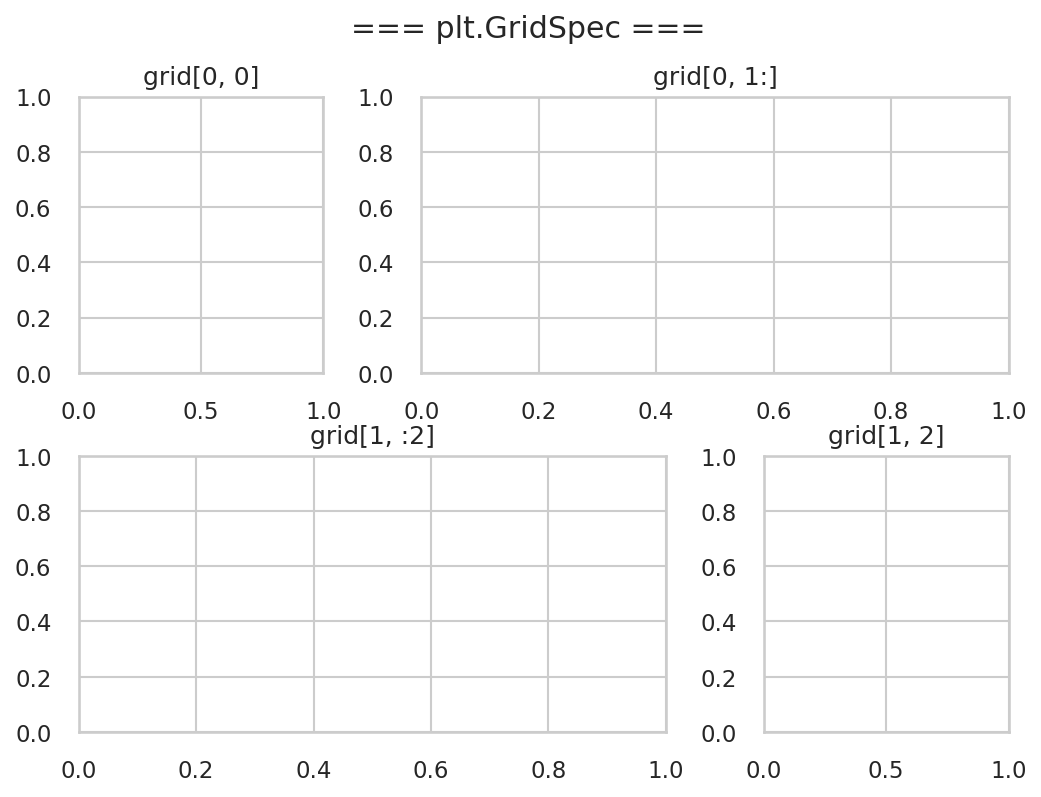

2. (1.5 points) For pokemons whose type1 is fire, water, or bug, create one figure (with several subplots) to conclude their histograms of hp, attack, and defense.

![Question2](https://github.com/RatanakamonS/DADS5001-PART1/blob/main/HW/matplotlib3_question2_answer.png?raw=1)